In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', on_bad_lines='skip')
df.info()

df

#Display the data
df.head()
df.info()

#Sum the missing value
df.isnull().sum()

# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

#Summary the description of the dataset
df.describe()
#Sum the missing value
df.isnull().sum()


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', on_bad_lines='skip')



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the path as per your actual file location)
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', parse_dates=['trans_date_trans_time'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

C:\Users\singh\AppData\Local\Temp\ipykernel_41096\3649909336.py:53: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', parse_dates=['trans_date_trans_time'])


In [31]:
## Data processing 
# Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', on_bad_lines='skip')

# Check the columns present in the dataframe
print("Columns in the DataFrame:")
print(df.columns)

# Ensure 'trans_date_trans_time' exists in the columns
if 'trans_date_trans_time' in df.columns:
    # Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
    df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
    df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time

    # Remove the 'trans_date_trans_time' column and 'Unnamed: 0' if it exists
    df.drop(columns=['trans_date_trans_time', 'Unnamed: 0'], errors='ignore', inplace=True)

    # Reorder the columns to have 'trans_date' first and 'trans_time' second
    columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
    df = df[columns]

    # Convert 'dob' to datetime
    df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

    # Check the data types
    print("\nData types of the columns:")
    print(df.dtypes)

    plt.figure(figsize=(14, 8))
    # Filter for transactions where is_fraud is 1
    df_fraud = df[df['is_fraud'] == 1]

    # Print columns of df_fraud to check column names and existence
    print("\nColumns of df_fraud:")
    print(df_fraud.columns)
else:
    print("'trans_date_trans_time' column not found in DataFrame.")

# Additional processing or plotting can follow here

df.head()
df.info()
df.describe()


Columns in the DataFrame:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Data types of the columns:
trans_date            object
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud  

,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,1.380679e+09,38.542798,-90.231380,0.003860
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,1.388534e+09,66.679297,-66.952026,1.000000
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,NaN,5.201104e+06,5.095829,13.733071,0.062008


<Figure size 1400x800 with 0 Axes>

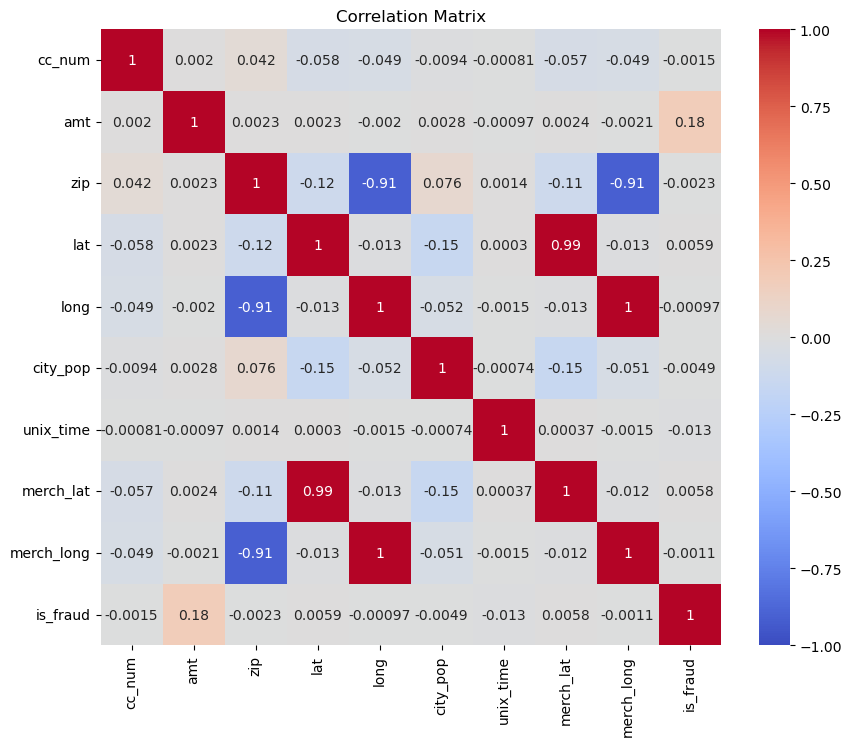

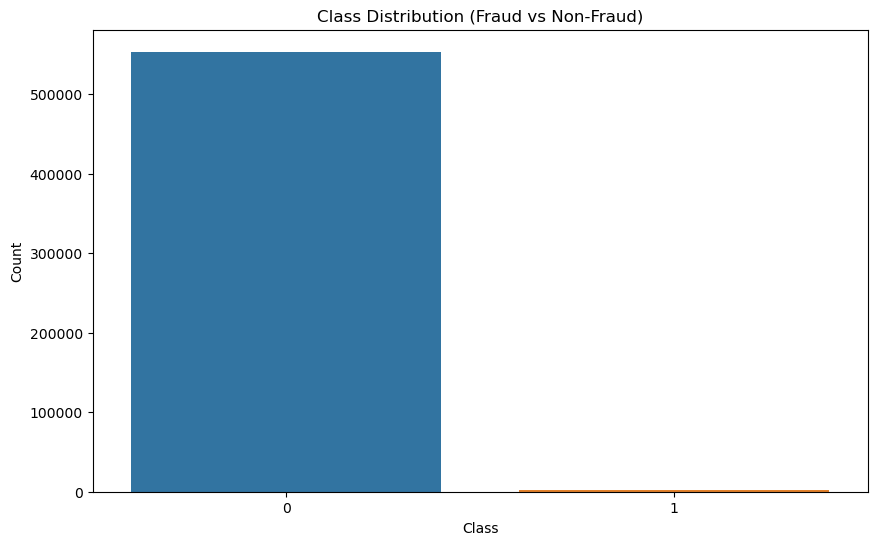

In [32]:
## EDA
#Distribute the class
df[('is_fraud')].value_counts()

# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature 1 "is_fraud"
# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


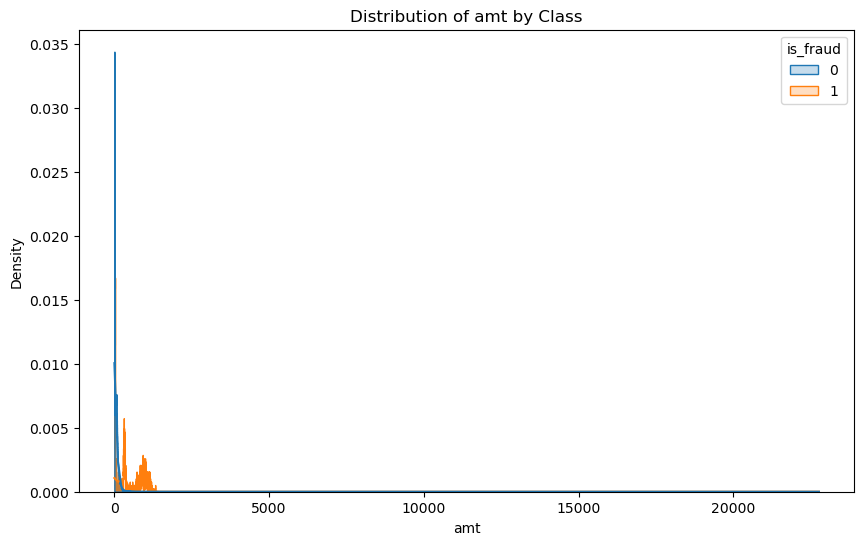

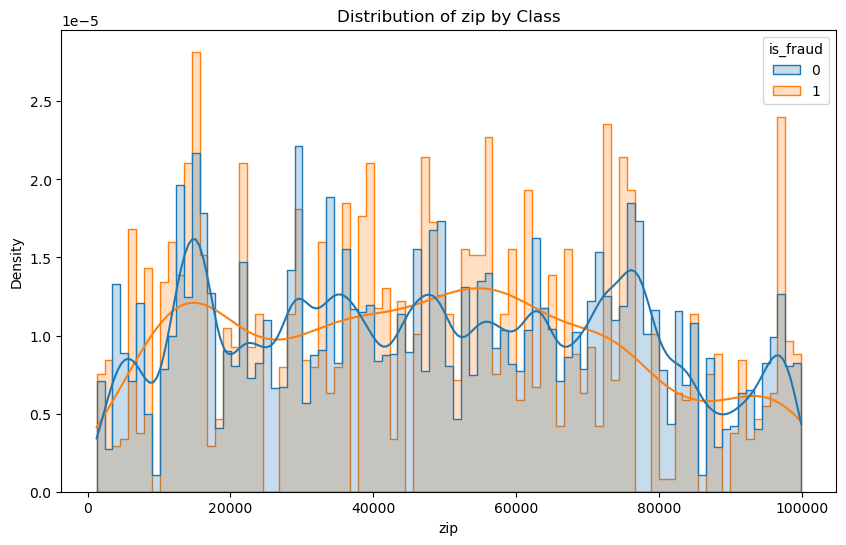

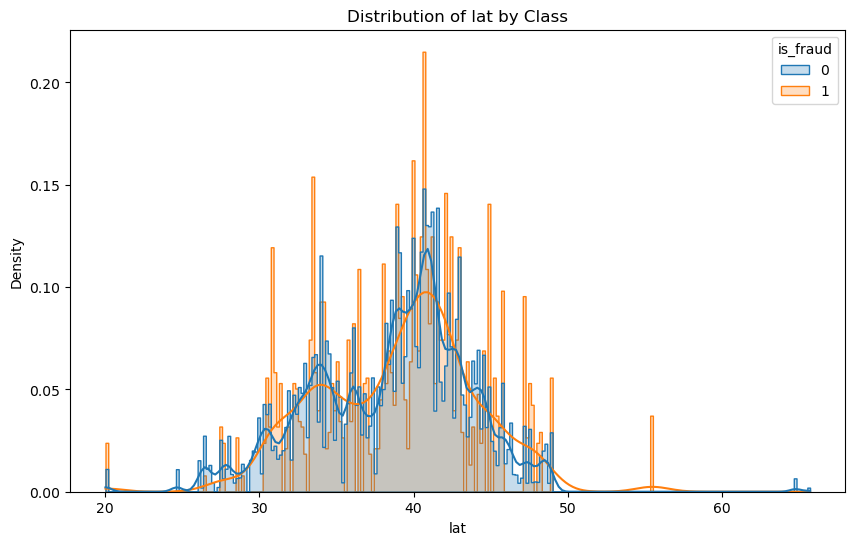

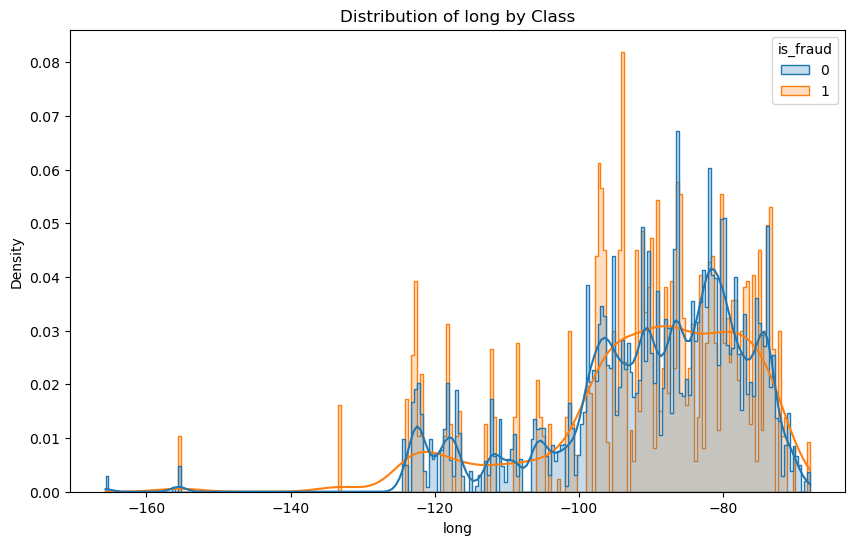

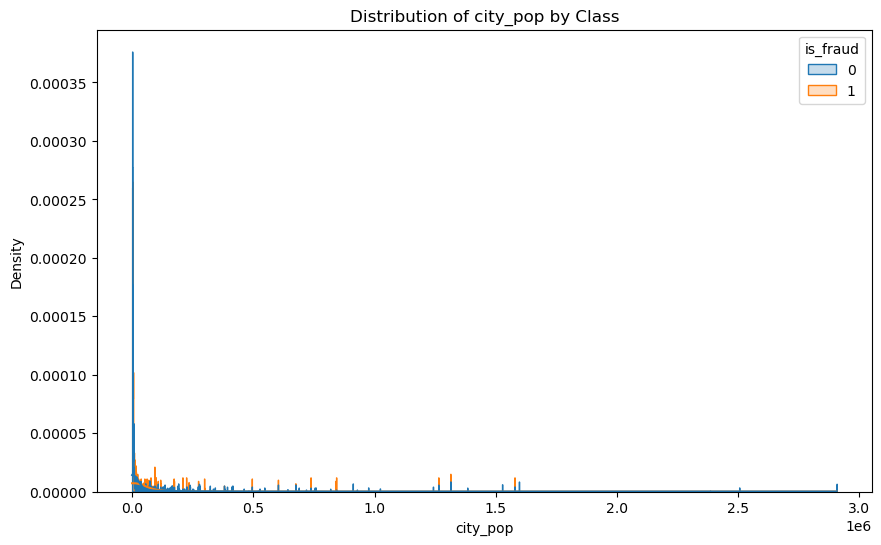

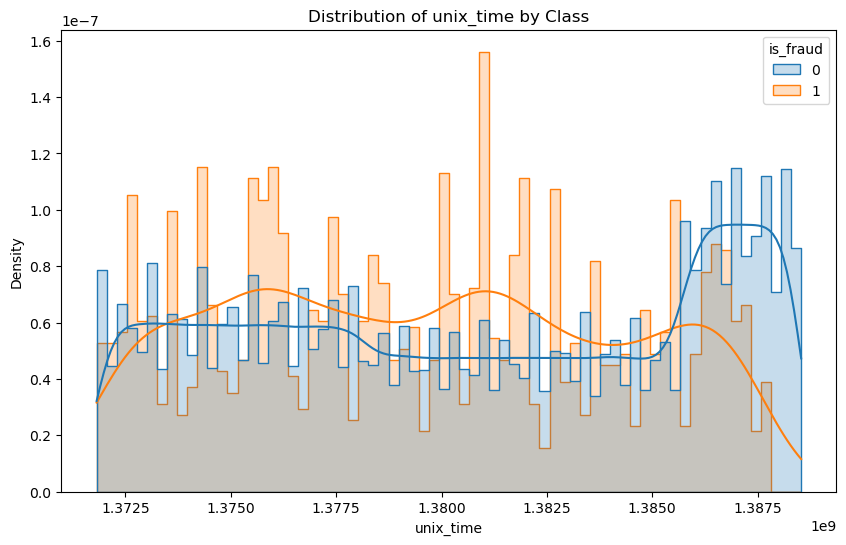

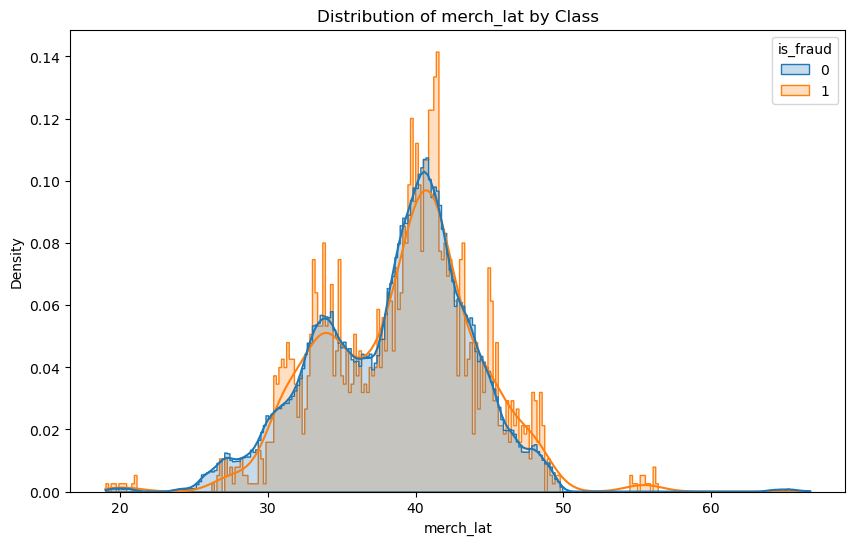

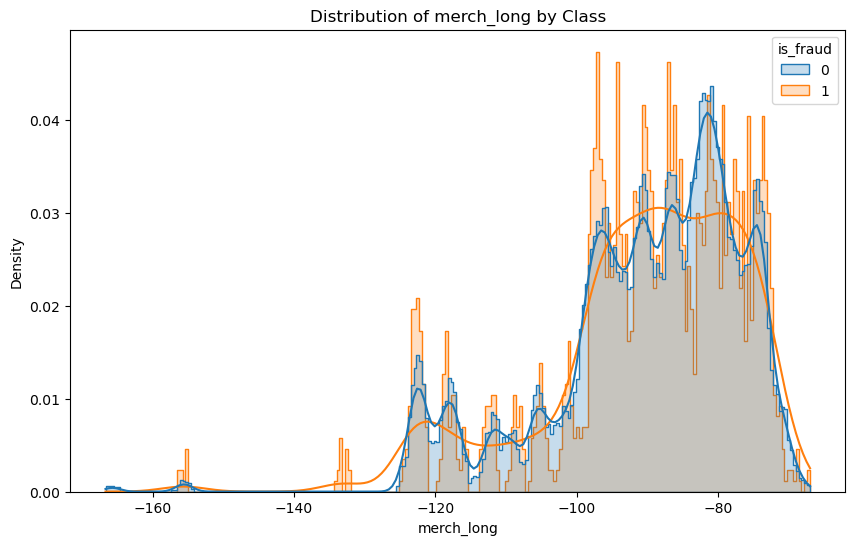

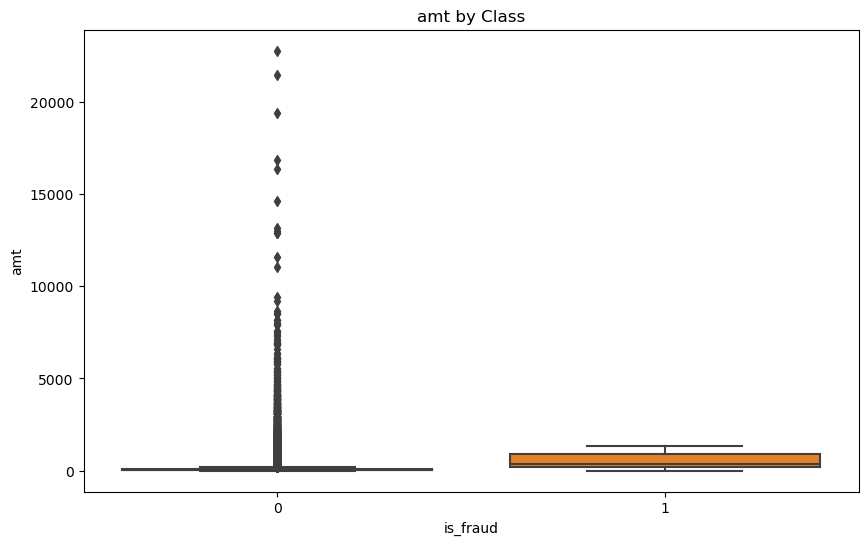

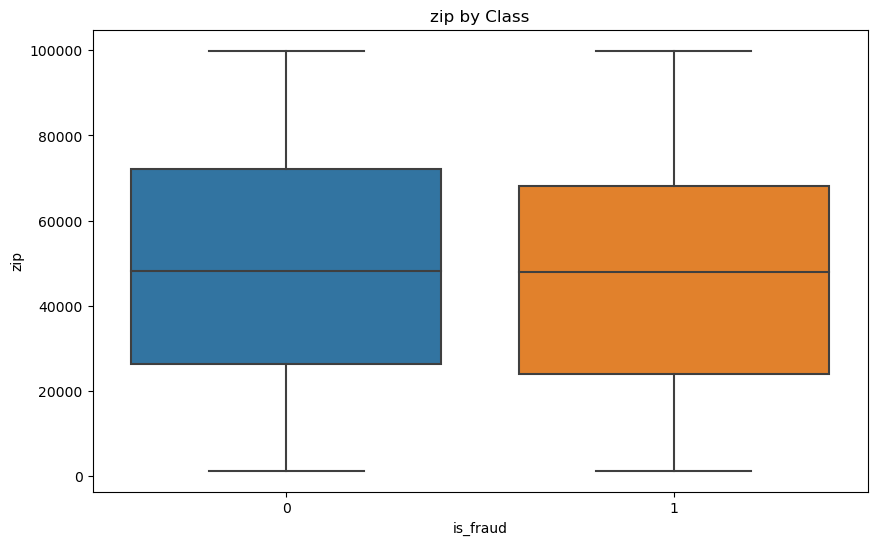

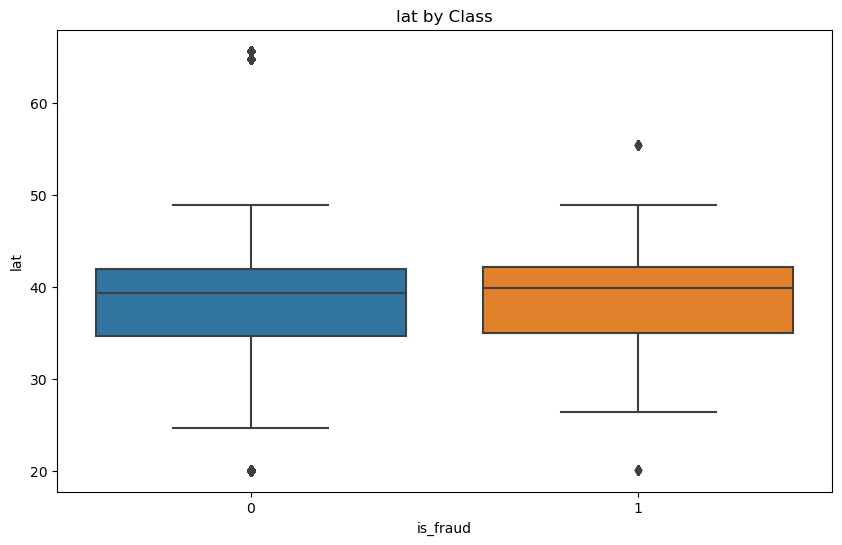

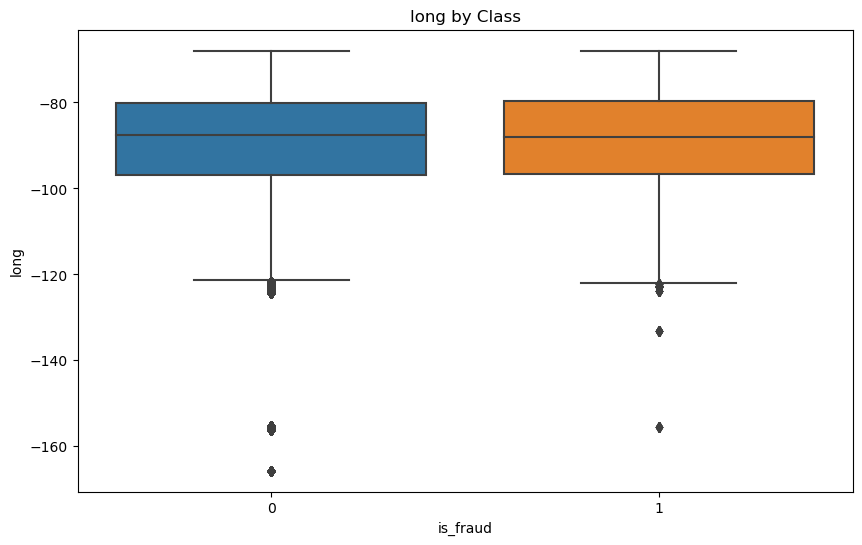

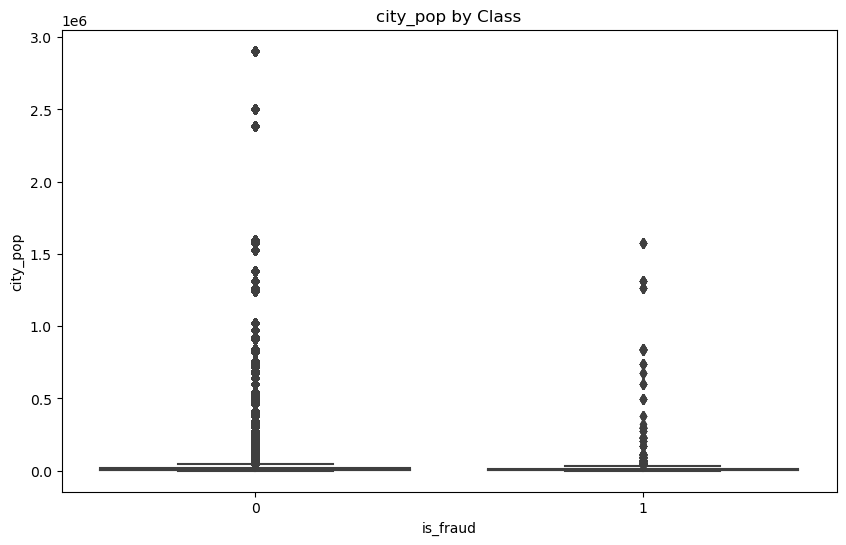

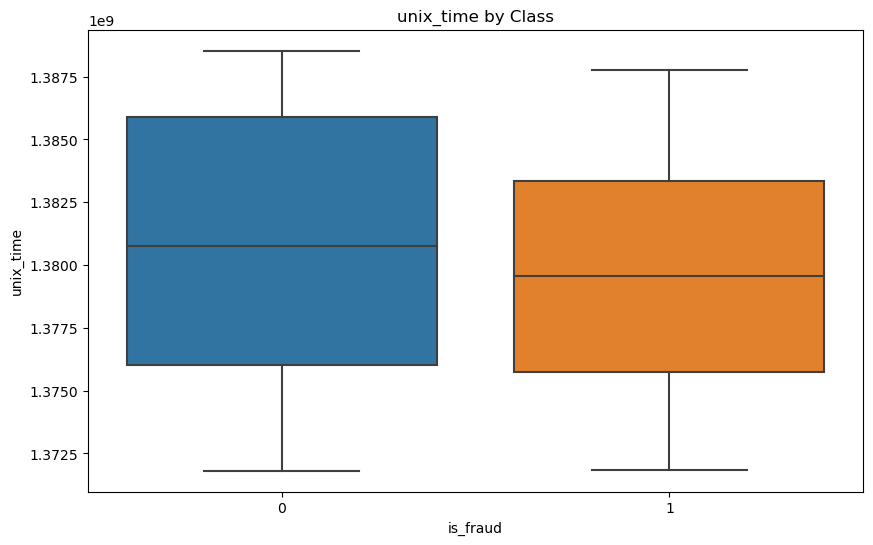

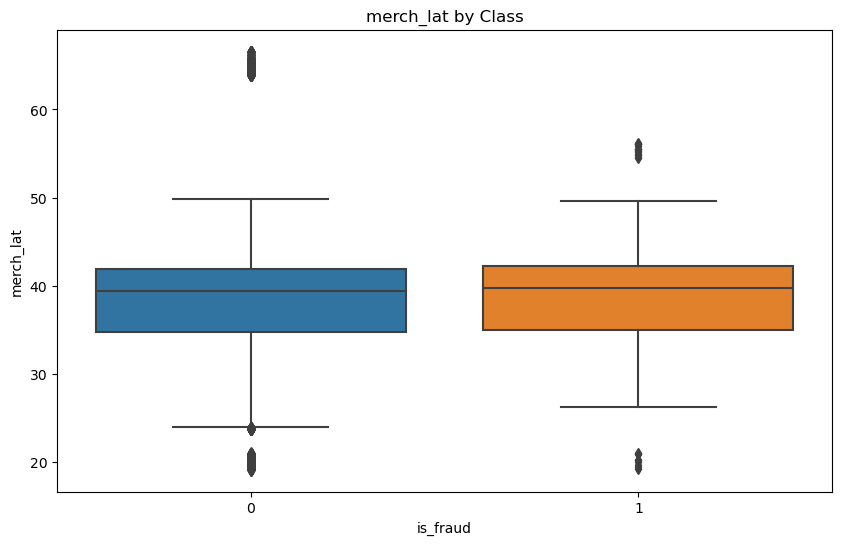

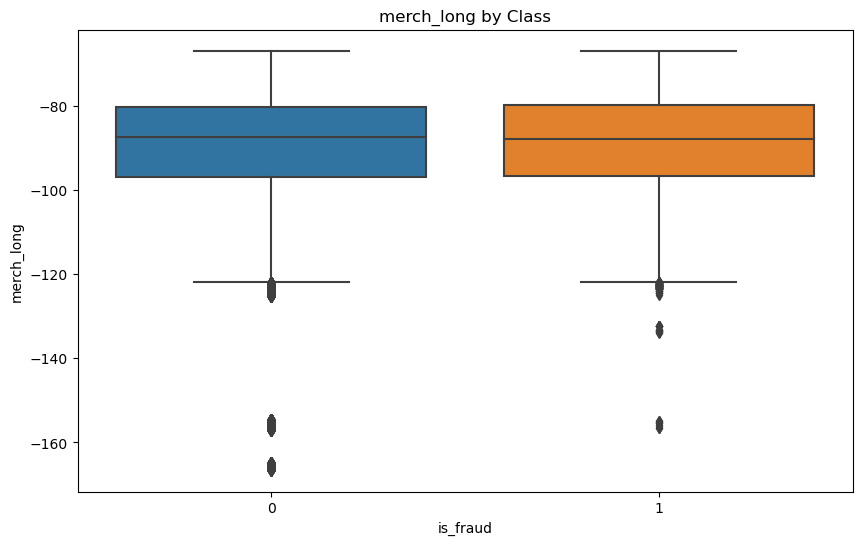

datetime64[ns]


In [33]:
##Feature "is_fraud" against features - 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'
# Function to plot the distribution of features based on class
def plot_feature_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='is_fraud', kde=True, element="step", stat="density", common_norm=False)
        plt.title(f'Distribution of {feature} by Class')
        plt.show()

# List of features to plot
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Plot the distributions
plot_feature_distribution(df, features)

# Function to plot boxplots of features based on class
def plot_feature_boxplots(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_fraud', y=feature, data=df)
        plt.title(f'{feature} by Class')
        plt.show()

# Plot the boxplots
plot_feature_boxplots(df, features)

# Convert 'trans_date' to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract month and year from 'trans_date'
df['trans_month_year'] = df['trans_date'].dt.to_period('M')

print(df['trans_date'].dtype)


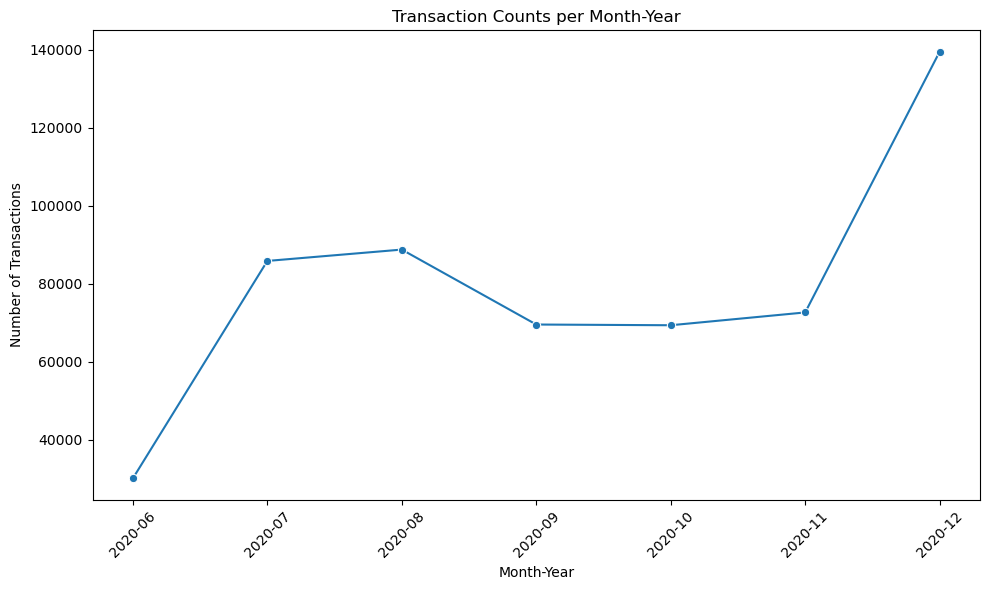

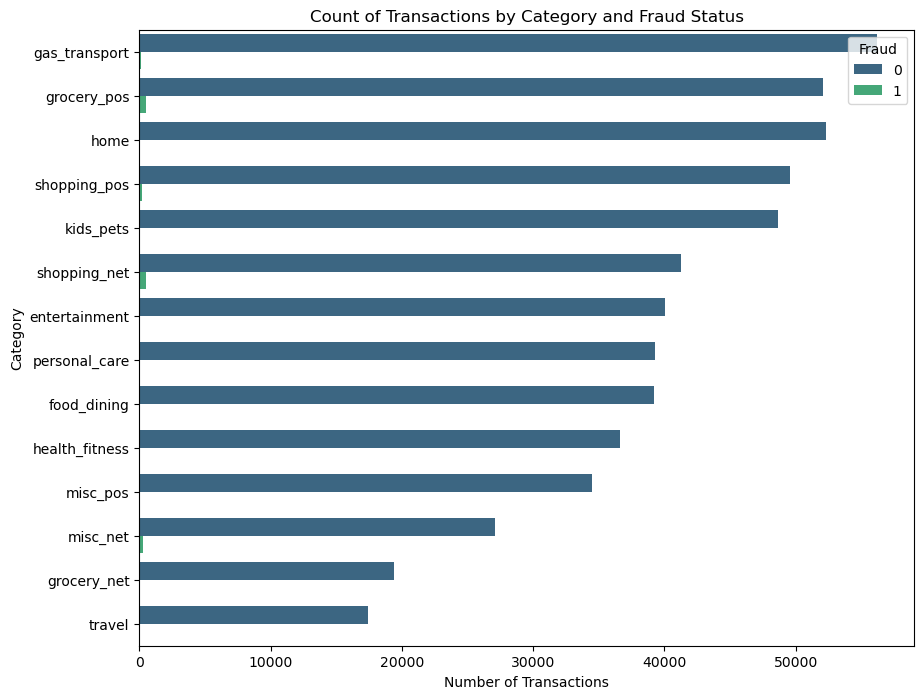

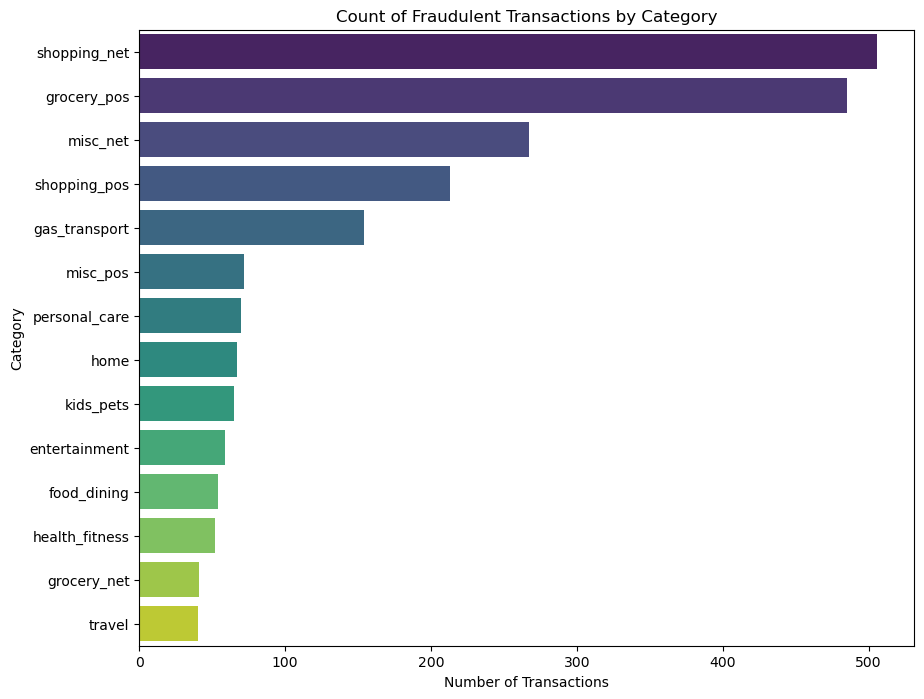

In [34]:
## Feature 2 trans_date
# EDA based on trans_month_year 
# Example: Count of transactions per month and year
transaction_counts = df['trans_month_year'].value_counts().sort_index()

# Plotting transaction counts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index.astype(str), y=transaction_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('Transaction Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


##Feature by category , by category vs is_fraud
# Plotting the horizontal bar plot for transactions by category
plt.figure(figsize=(10, 8))

# Countplot for both fraudulent and non-fraudulent transactions
sns.countplot(y='category', hue='is_fraud', data=df, palette='viridis', order=df['category'].value_counts().index)

plt.title('Count of Transactions by Category and Fraud Status')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.legend(title='Fraud', loc='upper right')
plt.show()


# Filter the DataFrame for fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]
# Plotting the horizontal bar plot for fraudulent transactions by category
plt.figure(figsize=(10, 8))
# Countplot for fraudulent transactions
sns.countplot(y='category', data=df_fraud, palette='viridis', order=df_fraud['category'].value_counts().index)
plt.title('Count of Fraudulent Transactions by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()


In [35]:
# Feature - Fraud Rate Over Time
# Assuming 'is_fraud' column exists
fraud_by_hour = df.groupby(df['trans_date_trans_time'].dt.hour)['is_fraud'].mean()

# Plotting fraud analysis by time
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title('Fraud Rate Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

## The fraudulent activities in histogram

# Ensure 'trans_date_trans_time' column exists
if 'trans_date_trans_time' not in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date'].astype(str) + ' ' + df['trans_time'].astype(str))

# Filter the DataFrame for fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot histogram for fraudulent transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fraud, x=df_fraud['trans_date_trans_time'].dt.hour, bins=24)
plt.title('Histogram of Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame
# Print columns to verify their existence and names
print(df.columns)

# Convert 'trans_date' and 'dob' to datetime format if they are not already in datetime format
# Adjust the format strings ('%d-%m-%Y') according to your actual date formats in the dataset
if 'trans_date' in df.columns:
    df['trans_date'] = pd.to_datetime(df['trans_date'], format='%d-%m-%Y')

if 'dob' in df.columns:
    df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

# Convert 'trans_time' to a proper datetime format (assuming 'trans_time' contains only time)
if 'trans_time' in df.columns:
    df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Combine 'trans_date' and 'trans_time' into a single datetime column
if 'trans_date' in df.columns and 'trans_time' in df.columns:
    df['trans_date_trans_time'] = df.apply(lambda row: datetime.combine(row['trans_date'], row['trans_time']), axis=1)

# Create new features: 'transaction_hour', 'transaction_day', 'transaction_month', 'age'
if 'trans_date_trans_time' in df.columns and 'dob' in df.columns:
    df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
    df['transaction_day'] = df['trans_date_trans_time'].dt.day
    df['transaction_month'] = df['trans_date_trans_time'].dt.month
    df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Display the first few rows to verify
print(df.head())


# Calculate the geographical distance between cardholder and merchant
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])


# Calculate transaction frequency and average amount within the last 24 hours
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])
df['trans_24h_count'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').trans_date_trans_time.count()).reset_index(level=0, drop=True)
df['trans_24h_amount_avg'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').amt.mean()).reset_index(level=0, drop=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Improved Visualization: Transaction Day
plt.figure(figsize=(14, 8))

# Plot density plots
sns.kdeplot(df[df['is_fraud'] == 0]['transaction_day'], color='blue', label='Non-Fraudulent', lw=2)
sns.kdeplot(df[df['is_fraud'] == 1]['transaction_day'], color='red', label='Fraudulent', lw=2)

# Add title and labels
plt.title('Transaction Day Distribution', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

# Calculate correlation between transaction day and fraud
correlation = df['transaction_day'].corr(df['is_fraud'])

print(f"Correlation between transaction day and fraud: {correlation:.2f}")

KeyError: 'trans_date_trans_time'

In [ ]:
## Feature - cc_num and amt
# Calculate the average and total transaction amount per user
df['avg_trans_amount'] = df.groupby('cc_num')['amt'].transform('mean')
df['total_trans_amount'] = df.groupby('cc_num')['amt'].transform('sum')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization: Average Transaction Amount per User
plt.figure(figsize=(14, 8))

# Boxplot
plt.subplot(2, 1, 1)
sns.boxplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

# Calculate correlation between transaction amount ('amt') and fraud ('is_fraud')
correlation = df['amt'].corr(df['is_fraud'])

print(f"Correlation between transaction amount and fraud: {correlation:.2f}")


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing transaction data
# Convert 'dob' to datetime and calculate age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365  # Calculate age in years

# Define age groups (you can adjust these as per your specific age ranges)
bins = [0, 20, 30, 40, 50, 60, 100]  # Define your age bins here
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']  # Labels for age groups

# Assign age groups based on 'age' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate correlation between age group and fraud
age_group_corr = df.groupby('age_group')['is_fraud'].mean()

print("Correlation between age group and fraud:")
print(age_group_corr)


In [ ]:
## Features - state, city , street
# Plot geographical distribution
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat', hue='is_fraud', palette=['blue', 'red'], data=df)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fraudulent (1) / Non-Fraudulent (0)')
plt.show()


# Filter the dataset to include only fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot State-wise Distribution of Fraudulent Transactions
plt.figure(figsize=(14, 10))
sns.countplot(y='state', data=df_fraud, order=df_fraud['state'].value_counts().index, palette=['red'])
plt.title('State-wise Distribution of Fraudulent Transactions')
plt.xlabel('Count')
plt.ylabel('State')

# Violin plot
plt.subplot(2, 1, 2)
sns.violinplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'}, inner='quartile')
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

plt.tight_layout()
plt.show()

# Visualization: Total Transaction Amount per User
plt.figure(figsize=(14, 8))

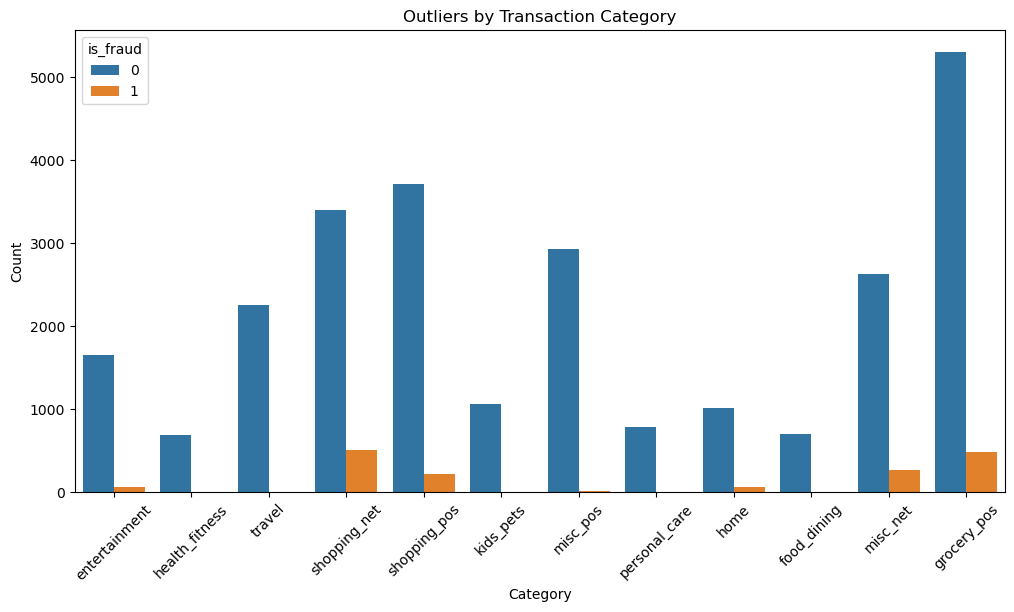

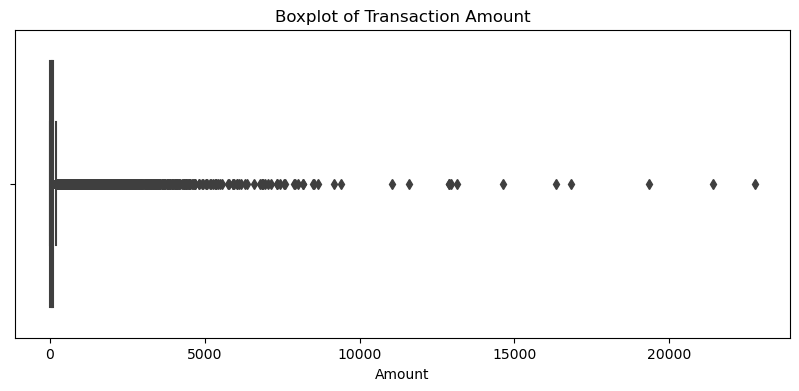

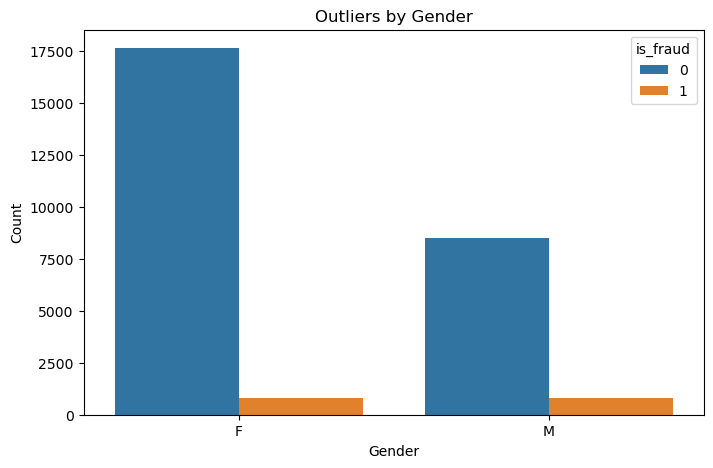

Total number of outliers: 27778
Number of fraud cases among outliers: 1613
Percentage of outliers that are fraud cases: 5.81%


In [36]:
## Outlier handling 
# Calculate quartiles
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]


plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=outliers)
plt.title('Outliers by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='amt', data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='is_fraud', data=outliers)
plt.title('Outliers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Assuming 'outliers' DataFrame contains your identified outliers
# Calculate the total number of outliers
total_outliers = outliers.shape[0]

# Calculate the number of outliers that are fraud cases
fraud_outliers = outliers[outliers['is_fraud'] == 1].shape[0]

# Calculate the percentage of outliers that are fraud cases
percentage_fraud_outliers = (fraud_outliers / total_outliers) * 100

print(f"Total number of outliers: {total_outliers}")
print(f"Number of fraud cases among outliers: {fraud_outliers}")
print(f"Percentage of outliers that are fraud cases: {percentage_fraud_outliers:.2f}%")

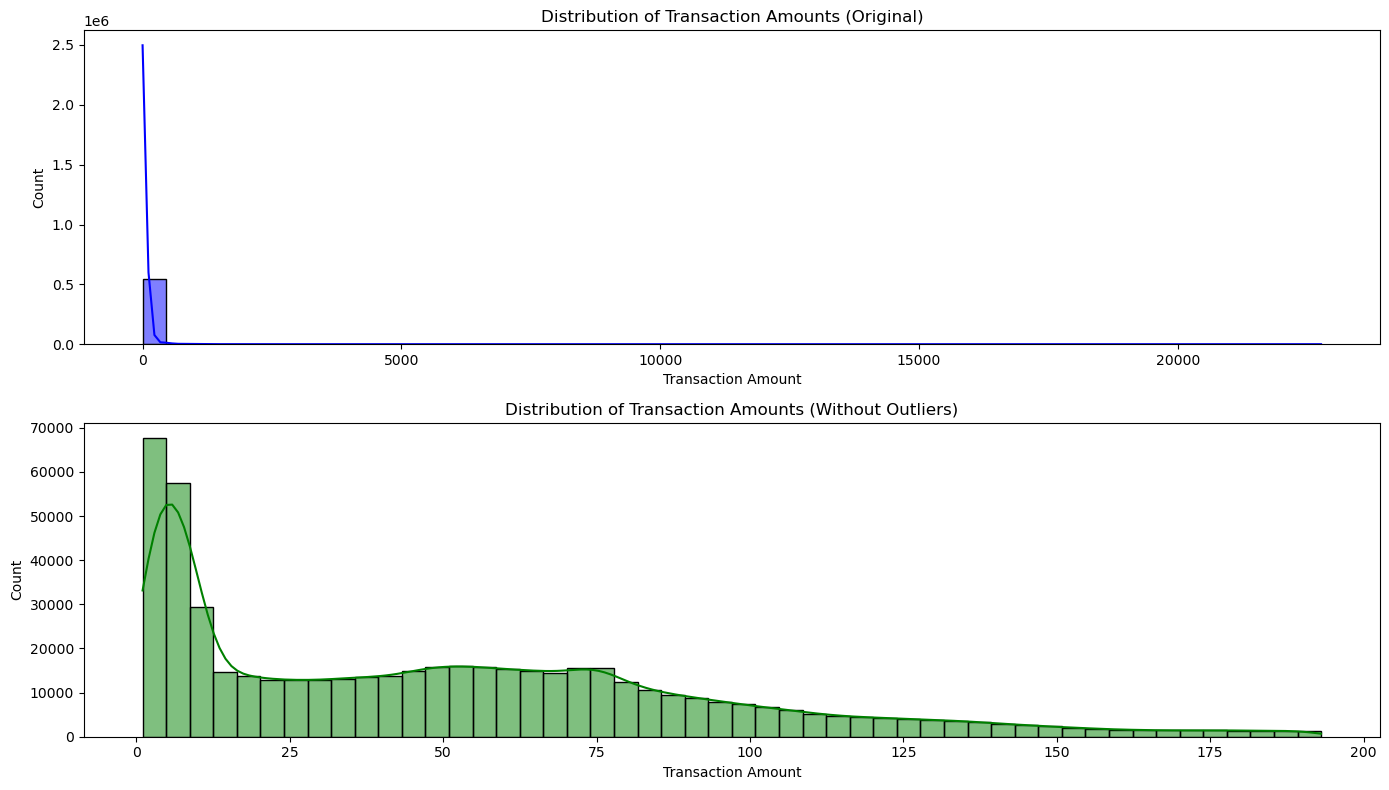

In [37]:
# Step 1: Evaluate Outlier Impact
plt.figure(figsize=(14, 8))

# Plot original distribution
plt.subplot(2, 1, 1)
sns.histplot(df['amt'], kde=True, bins=50, color='blue')
plt.title('Distribution of Transaction Amounts (Original)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

# Plot distribution without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[~df.index.isin(outliers.index)]['amt'], kde=True, bins=50, color='green')
plt.title('Distribution of Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

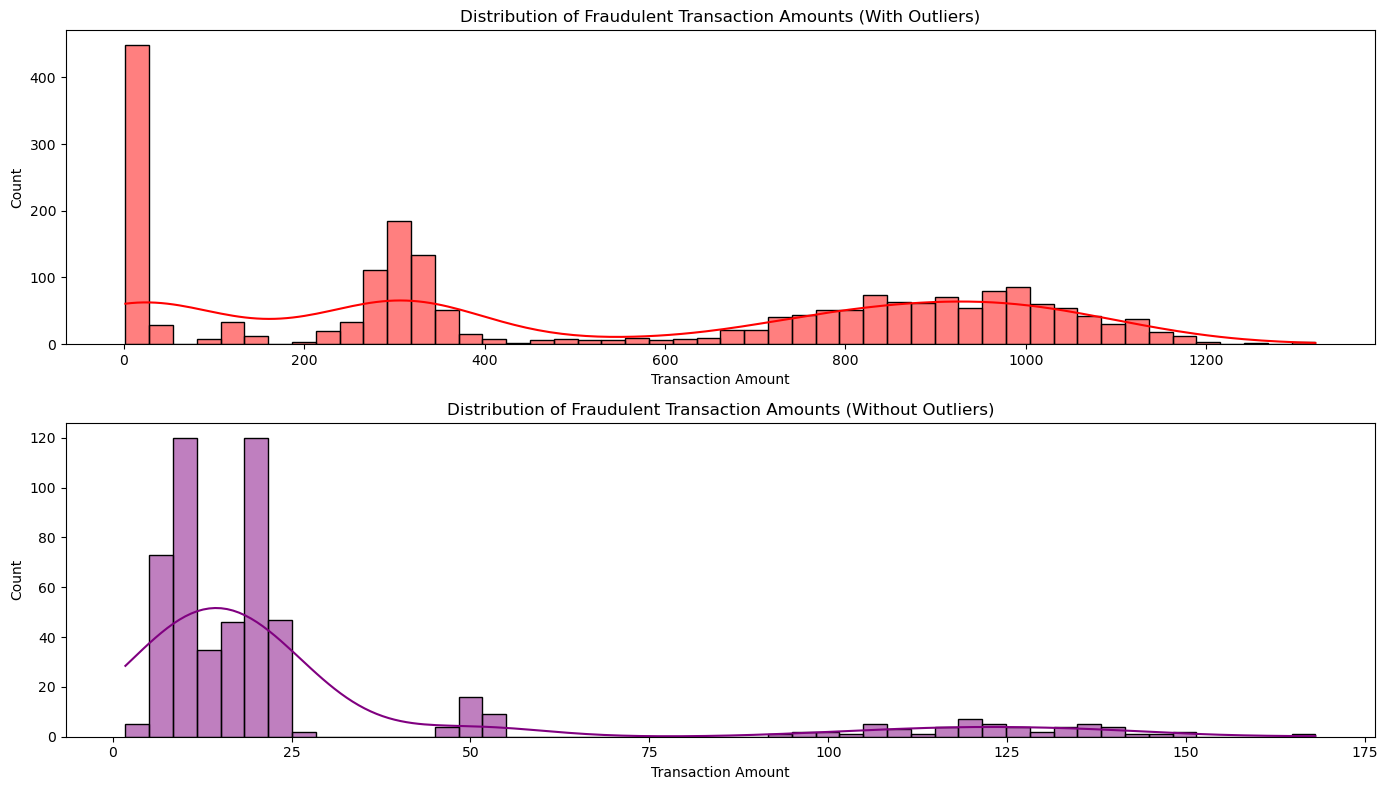


Average Transaction Amount by Age Range:
  age_range        amt
0     20-29  68.394439
1     30-39  73.448913
2     40-49  72.822523
3     50-59  66.206320
4     60-69  64.836601
5     70-79  65.259275
6     80-89  64.584630
7     90-99  63.852374


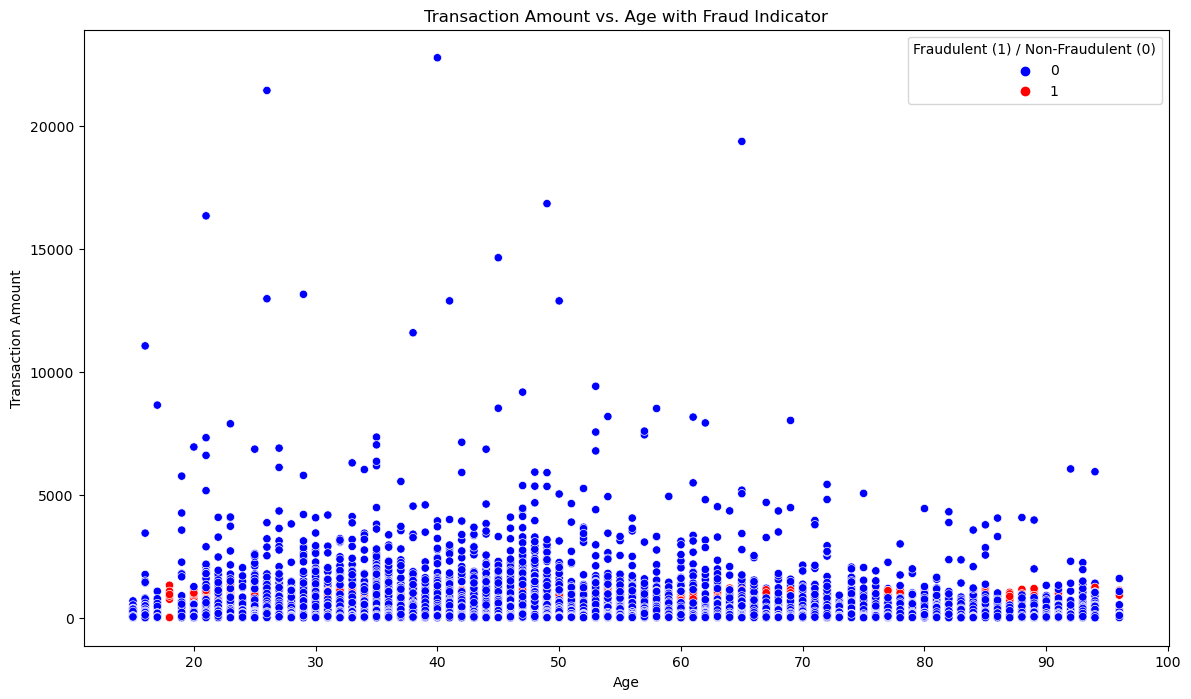

In [38]:
# Step 2: Consider Analysis Goals
# Example: If fraud detection is the goal, visualize fraudulent transactions with and without outliers
plt.figure(figsize=(14, 8))

# Plot fraudulent transactions with outliers
plt.subplot(2, 1, 1)
sns.histplot(df[df['is_fraud'] == 1]['amt'], kde=True, bins=50, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts (With Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

# Plot fraudulent transactions without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[(df['is_fraud'] == 1) & (~df.index.isin(outliers.index))]['amt'], kde=True, bins=50, color='purple')
plt.title('Distribution of Fraudulent Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', on_bad_lines='skip')

# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Calculate age from 'dob'
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y', errors='coerce')
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Plot Transaction Amount vs. Age with Fraud Indicator
plt.figure(figsize=(14, 8))
sns.scatterplot(x='age', y='amt', hue='is_fraud', palette=['blue', 'red'], data=df)
plt.title('Transaction Amount vs. Age with Fraud Indicator')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraudulent (1) / Non-Fraudulent (0)')

# Calculate average transaction amount by age range
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_amt_table = df.groupby('age_range')['amt'].mean().reset_index()

# Display as a table
print("\nAverage Transaction Amount by Age Range:")
print(age_amt_table)

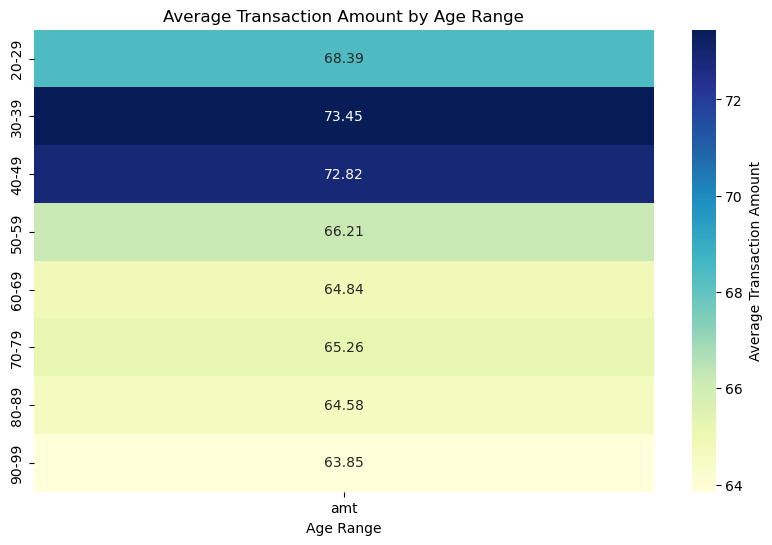

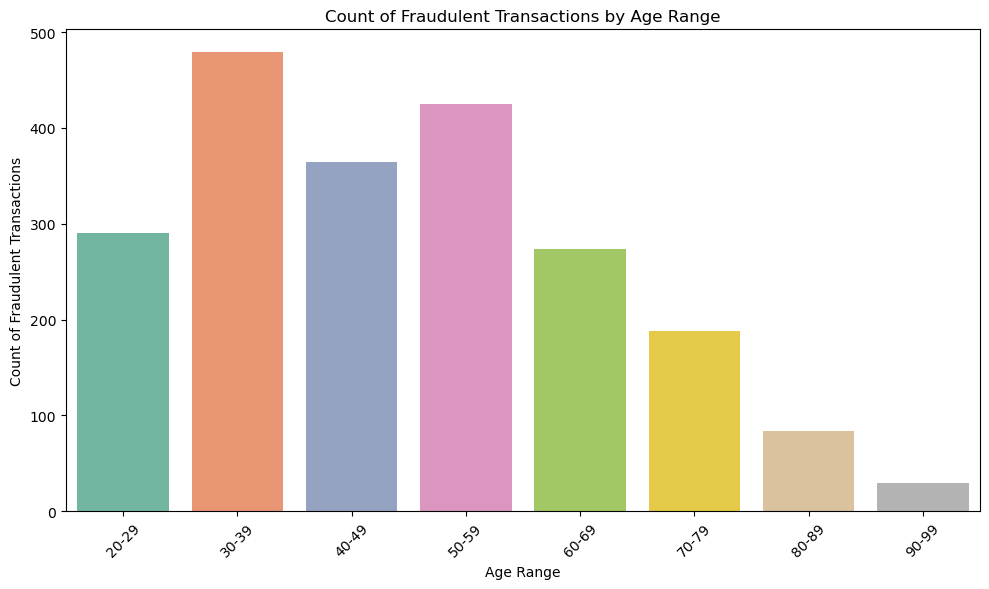


Summary of Transaction Data by Age Range:
  age_range    avg_amt  med_amt  fraudulent_count
0     20-29  68.394439   45.970               290
1     30-39  73.448913   51.110               479
2     40-49  72.822523   50.800               364
3     50-59  66.206320   42.830               425
4     60-69  64.836601   41.980               274
5     70-79  65.259275   43.420               188
6     80-89  64.584630   42.445                84
7     90-99  63.852374   44.035                29


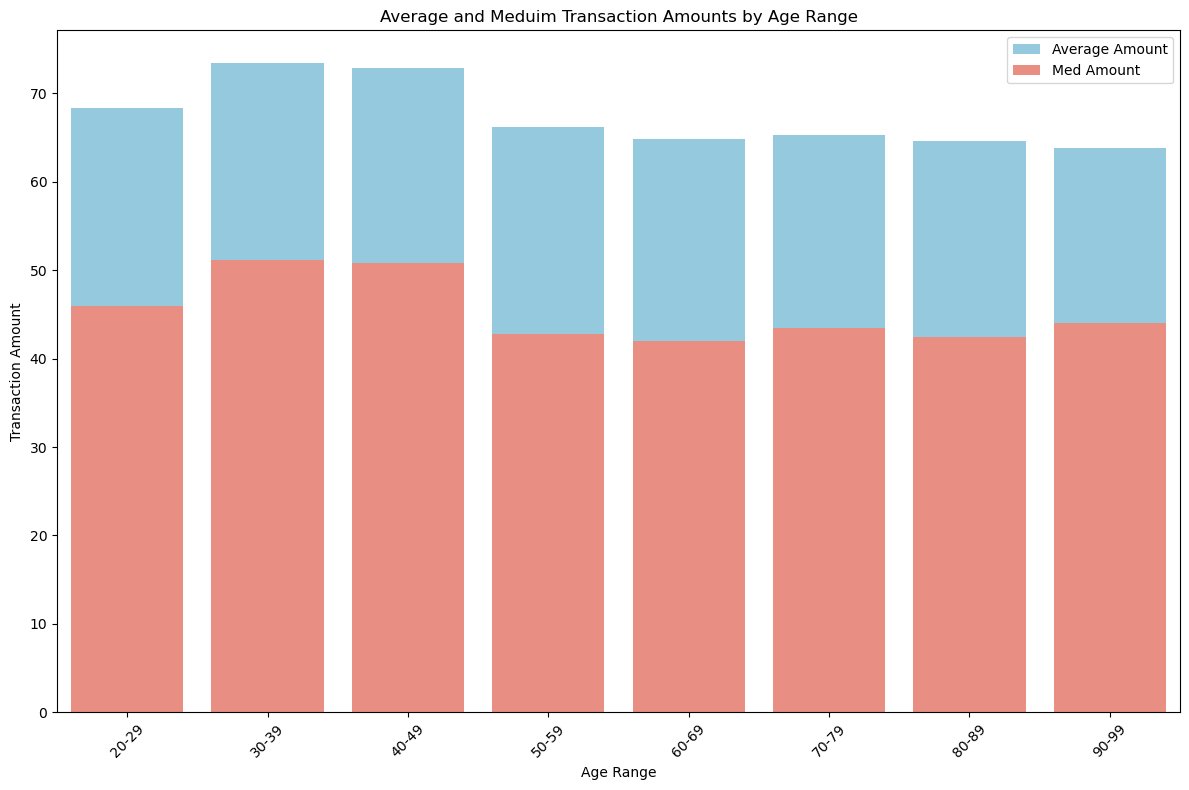

In [55]:
# Create a heatmap of average transaction amount by age range
heatmap_data = df.groupby('age_range')['amt'].mean().reset_index()
heatmap_data['age_range'] = pd.Categorical(heatmap_data['age_range'], categories=labels, ordered=True)
heatmap_data = heatmap_data.pivot_table(index='age_range', values='amt', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Transaction Amount'})
plt.title('Average Transaction Amount by Age Range')
plt.xlabel('Age Range')
plt.ylabel('')

# Count fraudulent transactions per age range
fraud_counts = df[df['is_fraud'] == 1].groupby('age_range').size().reset_index(name='fraudulent_count')

# Plot fraudulent transaction counts
plt.figure(figsize=(10, 6))
sns.barplot(x='age_range', y='fraudulent_count', data=fraud_counts, palette='Set2')
plt.title('Count of Fraudulent Transactions by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Calculate average transaction amount by age range
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate average transaction amount and maximum transaction amount by age range
summary_data = df.groupby('age_range').agg({
    'amt': ['mean', 'median'],
    'is_fraud': lambda x: (x == 1).sum()
}).reset_index()
summary_data.columns = ['age_range', 'avg_amt', 'med_amt', 'fraudulent_count']

# Display as a table
print("\nSummary of Transaction Data by Age Range:")
print(summary_data)


# Visualize average and maximum transaction amounts by age range
plt.figure(figsize=(12, 8))
sns.barplot(x='age_range', y='avg_amt', data=summary_data, color='skyblue', label='Average Amount')
sns.barplot(x='age_range', y='med_amt', data=summary_data, color='salmon', label='Med Amount')
plt.title('Average and Meduim Transaction Amounts by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Transaction Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

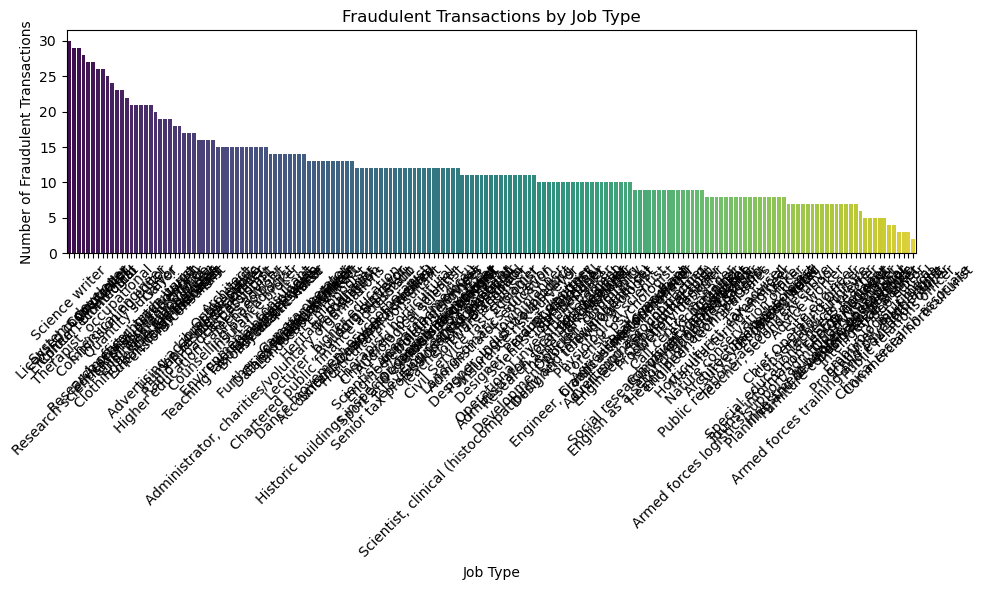

In [56]:
# Filter for transactions where is_fraud is 1
df_fraud = df[df['is_fraud'] == 1]

# Count the occurrences of each job type in fraudulent transactions
job_counts = df_fraud['job'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Fraudulent Transactions by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Class 0: (553574, 25)
Class 1: (2145, 25)
Undersampled dataset shape: (4290, 25)
is_fraud
0    2145
1    2145
Name: count, dtype: int64


<Axes: title={'center': 'count(target)'}, xlabel='is_fraud'>

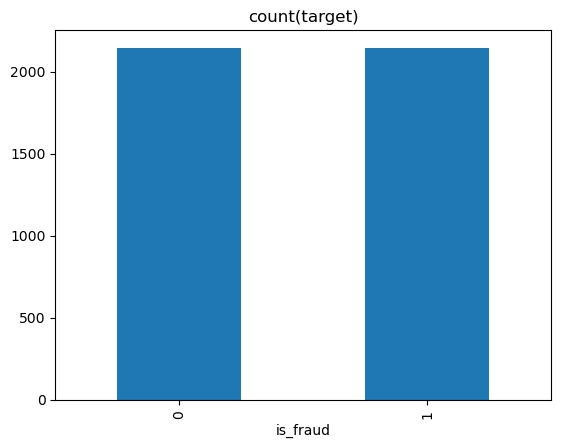

In [42]:
### FEATURE ENGINEERING (LONG)
class_count_0, class_count_1 = df['is_fraud'].value_counts()

# Separate the DataFrame into two classes
class_0 = df[df['is_fraud'] == 0]
class_1 = df[df['is_fraud'] == 1]

# Print the shape of each class
print('Class 0:', class_0.shape)
print('Class 1:', class_1.shape)

# Undersample the majority class
class_0_under = class_0.sample(class_count_1)

# Combine the undersampled majority class with the minority class
df_under = pd.concat([class_0_under, class_1], axis=0)

print('Undersampled dataset shape:', df_under.shape)
print(df_under['is_fraud'].value_counts())
df_under['is_fraud'].value_counts().plot(kind ='bar', title='count(target)')

In [2]:
## EDA #Distribute the class - to check corrb/w mechant and cusomter distnace
df_under[('is_fraud')].value_counts()

# Select only numeric columns for correlation calculation
numeric_columns = ['lat', 'long','merch_lat', 'merch_long', 'is_fraud']
df_numeric = df_under[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



NameError: name 'df_under' is not defined

In [ ]:
##The correlation matrix you provided indicates the correlation coefficients between various pairs of features. Here's the analysis based on the matrix:

##Correlation between merch_long and long
###Correlation Coefficient: 1
## Interpretation: There is a perfect positive correlation between merch_long and long. This means that as long increases or decreases, merch_long increases or decreases proportionally. Essentially, they are likely the same or very closely related variables.
## Correlation between merch_lat and lat
## Correlation Coefficient: 0.99
## ##Interpretation: There is an almost perfect positive correlation between merch_lat and lat. This indicates that these two variables move together very closely, with a strong linear relationship. When lat increases, merch_lat also increases, and vice versa.
## General Interpretation
## The near-perfect correlations between the latitude (lat) and merchant latitude (merch_lat), as well as between the longitude (long) and merchant longitude (merch_long), suggest that the merchant's location is very close to the transaction location. This could imply that transactions typically occur at or near the merchant's registered location, which could be a normal pattern for legitimate transactions.
## Next Steps
## Given the high correlation, it might be useful to investigate if having both pairs of features (lat, merch_lat and long, merch_long) adds any extra value to the model or if one set could be redundant. Highly correlated features can sometimes lead to multicollinearity in logistic regression, which can affect the stability of the model coefficients.
## You might consider dimensionality reduction techniques like PCA or simply dropping one of the pairs to see if it improves the model performance or interpretability.
## Would you like to proceed with any specific analysis or modifications based on this correlation information?

In [1]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

NameError: name 'df' is not defined

In [ ]:
# Calculate total transactions of each user per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date']])['trans_date'].transform('count')

# Print the relevant columns to verify
print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())